In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(5,5)

In [3]:
df=pd.read_csv('/Users/akshat/Downloads/archive-2/heart.csv')

In [81]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [82]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [83]:
print(df.columns)

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')


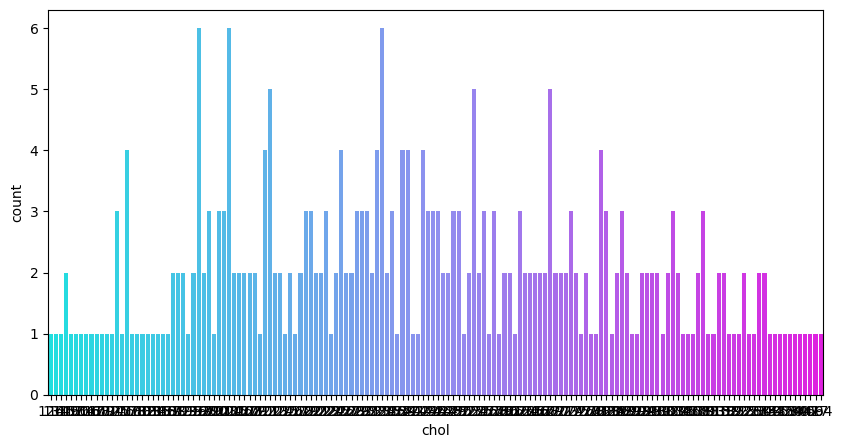

In [84]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='chol', palette='cool')
plt.show()

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df["oldpeak"] = df["oldpeak"].astype(float)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [135]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1,1,1,3,0


In [87]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot:>

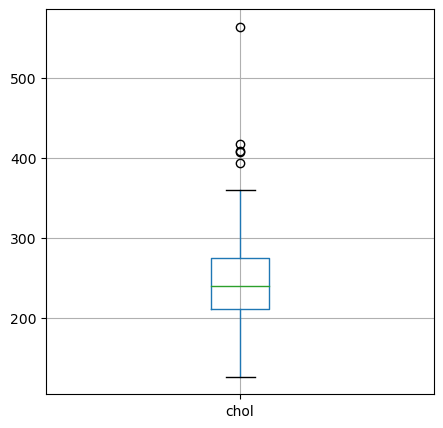

In [88]:
df.boxplot(['chol'])

<AxesSubplot:>

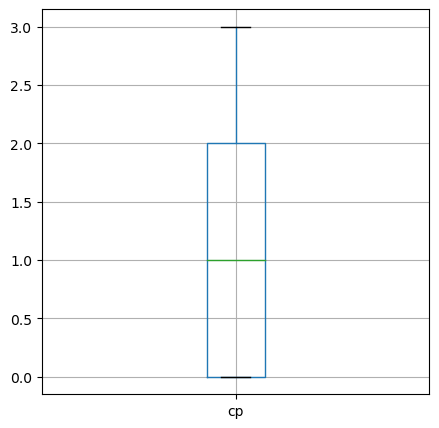

In [89]:
df.boxplot(['cp'])

In [90]:
df.drop(['output'], axis=1)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2,0,0,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2
2,41,0,1,130,204,0,0,172,0,1,2,0,2
3,56,1,1,120,236,0,1,178,0,0,2,0,2
4,57,0,0,120,354,0,1,163,1,0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0,1,0,3
299,45,1,3,110,264,0,1,132,0,1,1,0,3
300,68,1,0,144,193,1,1,141,0,3,1,2,3
301,57,1,0,130,131,0,1,115,1,1,1,1,3


In [91]:
X= df.drop('output', axis=1)
y=df['output']

In [92]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=df.columns[:-1])

[0.07 0.06 0.13 0.06 0.06 0.02 0.04 0.09 0.1  0.08 0.07 0.13 0.1 ]


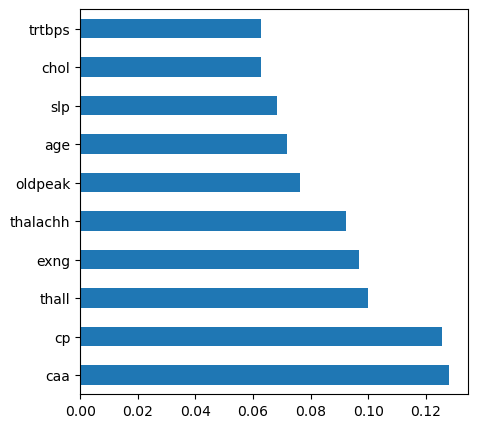

In [93]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [94]:
X = X.drop(['slp','chol', 'trtbps'] , axis=1)
X.head()

,age,sex,cp,fbs,restecg,thalachh,exng,oldpeak,caa,thall
0,0.952197,0.681005,1.973123,2.394438,-1.005832,0.015443,-0.696631,1.154475,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.417635,0.898962,1.633471,-0.696631,2.089785,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.417635,-1.005832,0.977514,-0.696631,0.219165,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.417635,0.898962,1.239897,-0.696631,-0.716145,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.417635,0.898962,0.583939,1.435481,-0.716145,-0.714429,-0.512922


In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset:", X_train.shape)
print("Number transactions Y_train dataset:", y_train.shape)
print("Number transactions X_test dataset:", X_test.shape)
print("Number transactions X_test dataset:", y_test.shape)

Number transactions X_train dataset: (212, 10)
Number transactions Y_train dataset: (212,)
Number transactions X_test dataset: (91, 10)
Number transactions X_test dataset: (91,)


In [96]:
acc=[]
model=[]

In [97]:
#handling imbalanced data

from imblearn.over_sampling import SMOTE


print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm=SMOTE(random_state=2)
X_train_res, y_train_res=sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_Y: {} \n'.format(y_train_res.shape))

print('After OverSampling, counts of label \'1\': {}'.format(sum(y_train_res==1)))
print('After OverSampling, counts of label \'0\': {}'.format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 118
Before OverSampling, counts of label '0': 94 

After OverSampling, the shape of train_X: (236, 10)
After OverSampling, the shape of train_Y: (236,) 

After OverSampling, counts of label '1': 118
After OverSampling, counts of label '0': 118


In [98]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [99]:
ytrain = LR.predict(X_train)
ytrain

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [100]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0])

In [101]:
ytrain_prob=LR.predict_proba(X_train)
ytrain_prob

array([[0.45, 0.55],
       [0.43, 0.57],
       [0.73, 0.27],
       [0.26, 0.74],
       [0.73, 0.27],
       [0.65, 0.35],
       [0.79, 0.21],
       [0.26, 0.74],
       [0.69, 0.31],
       [0.66, 0.34],
       [0.22, 0.78],
       [0.78, 0.22],
       [0.41, 0.59],
       [0.62, 0.38],
       [0.34, 0.66],
       [0.3 , 0.7 ],
       [0.35, 0.65],
       [0.53, 0.47],
       [0.35, 0.65],
       [0.68, 0.32],
       [0.62, 0.38],
       [0.52, 0.48],
       [0.73, 0.27],
       [0.66, 0.34],
       [0.76, 0.24],
       [0.38, 0.62],
       [0.36, 0.64],
       [0.37, 0.63],
       [0.44, 0.56],
       [0.23, 0.77],
       [0.38, 0.62],
       [0.41, 0.59],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.35, 0.65],
       [0.41, 0.59],
       [0.52, 0.48],
       [0.21, 0.79],
       [0.31, 0.69],
       [0.3 , 0.7 ],
       [0.61, 0.39],
       [0.39, 0.61],
       [0.4 , 0.6 ],
       [0.37, 0.63],
       [0.59, 0.41],
       [0.41, 0.59],
       [0.23, 0.77],
       [0.86,

In [102]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.75, 0.25],
       [0.34, 0.66],
       [0.33, 0.67],
       [0.77, 0.23],
       [0.61, 0.39],
       [0.45, 0.55],
       [0.75, 0.25],
       [0.62, 0.38],
       [0.84, 0.16],
       [0.84, 0.16],
       [0.42, 0.58],
       [0.29, 0.71],
       [0.71, 0.29],
       [0.32, 0.68],
       [0.26, 0.74],
       [0.49, 0.51],
       [0.67, 0.33],
       [0.4 , 0.6 ],
       [0.82, 0.18],
       [0.31, 0.69],
       [0.34, 0.66],
       [0.53, 0.47],
       [0.65, 0.35],
       [0.68, 0.32],
       [0.34, 0.66],
       [0.5 , 0.5 ],
       [0.6 , 0.4 ],
       [0.49, 0.51],
       [0.21, 0.79],
       [0.4 , 0.6 ],
       [0.49, 0.51],
       [0.74, 0.26],
       [0.24, 0.76],
       [0.38, 0.62],
       [0.3 , 0.7 ],
       [0.44, 0.56],
       [0.74, 0.26],
       [0.33, 0.67],
       [0.69, 0.31],
       [0.59, 0.41],
       [0.36, 0.64],
       [0.36, 0.64],
       [0.49, 0.51],
       [0.7 , 0.3 ],
       [0.54, 0.46],
       [0.41, 0.59],
       [0.38, 0.62],
       [0.4 ,

In [103]:
#Evaluating

#using jaccard index

Logistic_Regression_Train=jaccard_score(y_train, ytrain,pos_label=0)
Logistic_Regression_Train
Logistic_Regression_Test=jaccard_score(y_test, yhat,pos_label=0)
print("Accuracy: ", Logistic_Regression_Test)

Accuracy:  0.6122448979591837


In [104]:
acc.append(Logistic_Regression_Test)
model.append('Logistic Regression')

In [105]:
#using confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[42  5]
 [14 30]]


Confusion matrix, without normalization
[[42  5]
 [14 30]]


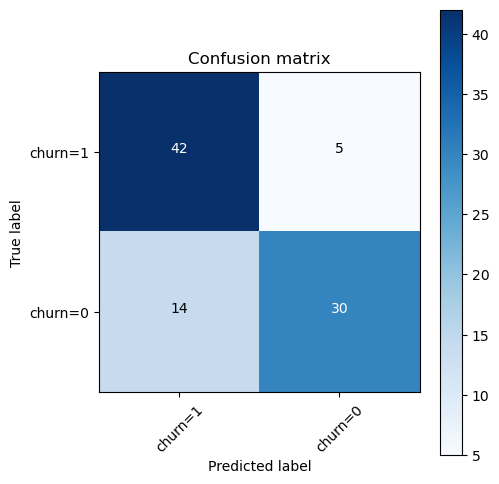

In [106]:
import itertools

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=1','churn=0'],normalize= False,  title='Confusion matrix')

In [107]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76        44
           1       0.75      0.89      0.82        47

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



In [108]:
#using log loss

log_loss(y_test, yhat_prob)

0.5086115144895507

In [109]:
print(Logistic_Regression_Test)

0.6122448979591837


In [110]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import metrics
import itertools

In [111]:
strokeTree= DecisionTreeClassifier(criterion="entropy", max_depth=4)
strokeTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [112]:
strokeTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [113]:
#prediction

trainTree=strokeTree.predict(X_train)
predTree=strokeTree.predict(X_test)

print(predTree [0:5])
print(y_test [0:5])

[0 0 0 0 0]
225    0
152    1
228    0
201    0
52     1
Name: output, dtype: int64


In [114]:
#evaluation

Decision_Tree_Train=metrics.accuracy_score(y_train, trainTree)
Decision_Tree_Test=metrics.accuracy_score(y_test, predTree)
acc.append(Decision_Tree_Train)
model.append('Decision Tree')
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, predTree))

Decision Tree's Accuracy:  0.7692307692307693


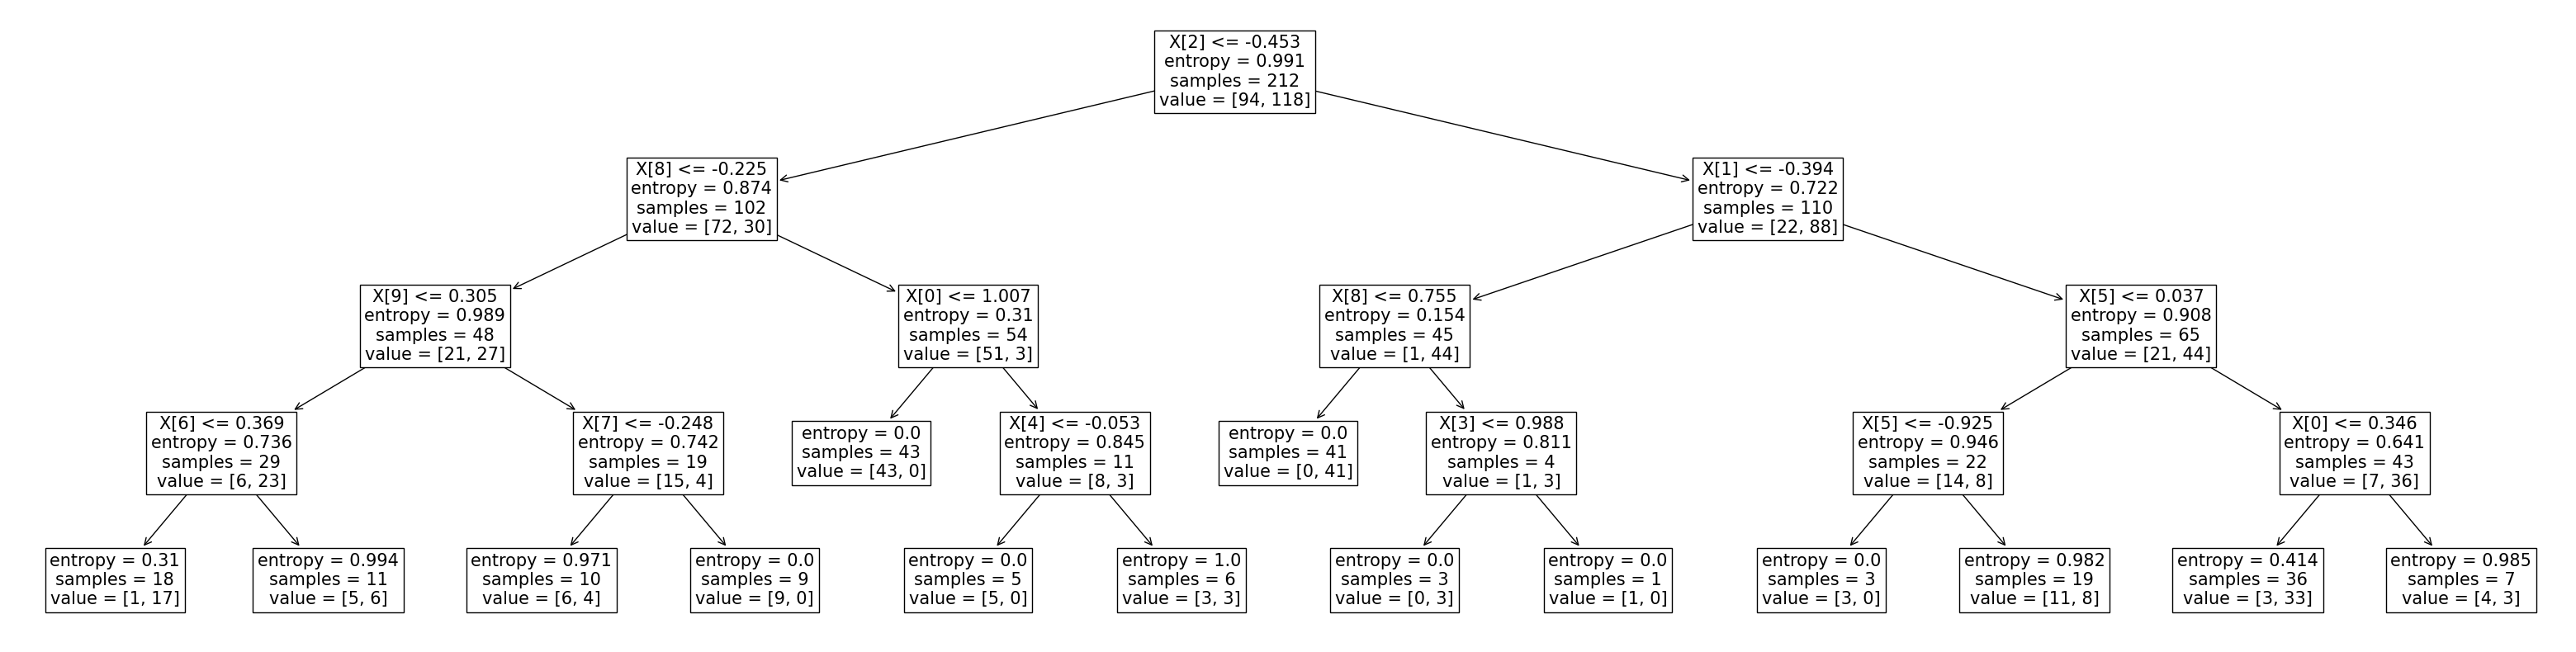

In [115]:
#plot a tree

fig, axe = plt.subplots(figsize=(40,10))
tree.plot_tree(strokeTree,ax = axe, fontsize=15)
plt.show()

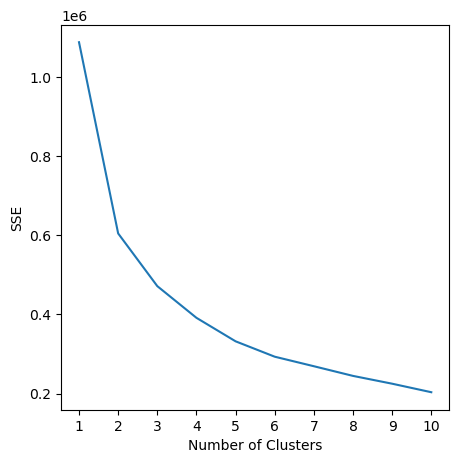

In [116]:
#KNN

from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

#create list to hold SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [117]:
k = 3
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=3)

In [118]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 1, 1, 0, 1])

In [119]:
KNN_Train=metrics.accuracy_score(y_train, neigh.predict(X_train))
KNN_Test=metrics.accuracy_score(y_test, yhat)

In [120]:
print("Train set Accuracy: ",KNN_Train )
print("Test set Accuracy: ",KNN_Test )

Train set Accuracy:  0.8443396226415094
Test set Accuracy:  0.8241758241758241


In [121]:
acc.append(KNN_Test)
model.append('KNN')

In [122]:
#RFC

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

train_values = RF.predict(X_train)
predicted_values = RF.predict(X_test)

RFC_Train= metrics.accuracy_score(y_train, train_values)
RFC_Test= metrics.accuracy_score(y_test, predicted_values)
acc.append(RFC_Test)
model.append('RF')
print("Random Forest Accuracy is: ", RFC_Test)

print(classification_report(y_test,predicted_values))

Random Forest Accuracy is:  0.7802197802197802
              precision    recall  f1-score   support

           0       0.80      0.73      0.76        44
           1       0.76      0.83      0.80        47

    accuracy                           0.78        91
   macro avg       0.78      0.78      0.78        91
weighted avg       0.78      0.78      0.78        91



In [123]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB
NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train, y_train)

train_values = NaiveBayes.predict(X_train)
predicted_values = NaiveBayes.predict(X_test)
Naive_Bayes_Train = metrics.accuracy_score(y_train, train_values)
Naive_Bayes_Test = metrics.accuracy_score(y_test, predicted_values)
acc.append(Naive_Bayes_Test)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", Naive_Bayes_Test)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.7692307692307693
              precision    recall  f1-score   support

           0       0.81      0.68      0.74        44
           1       0.74      0.85      0.79        47

    accuracy                           0.77        91
   macro avg       0.78      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



Logistic Regression Accuracy: 0.6122448979591837
Decision Tree's Accuracy:  0.7692307692307693
Random Forest Accuracy: 0.7802197802197802
K-Nearest Neighbors Accuracy: 0.8241758241758241
Naive Bayes Classifier Accuracy: 0.7692307692307693


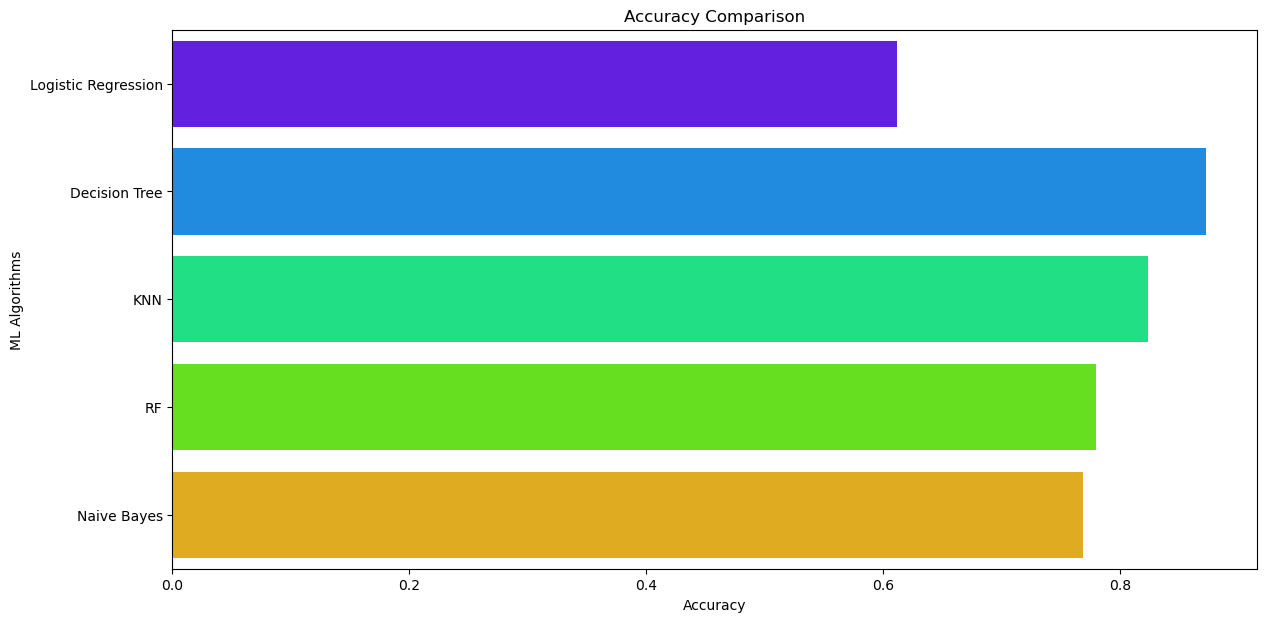

In [124]:
print('Logistic Regression Accuracy:',Logistic_Regression_Test )
print("Decision Tree's Accuracy: ", metrics.accuracy_score(y_test, predTree))
print('Random Forest Accuracy:', RFC_Test)
print('K-Nearest Neighbors Accuracy:', KNN_Test)
print('Naive Bayes Classifier Accuracy:', Naive_Bayes_Test)

plt.figure(figsize=[14,7],dpi = 100, facecolor='white')
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('ML Algorithms')
sns.barplot(x = acc,y = model,palette='gist_rainbow_r')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')

In [125]:
# select best model based on accuracy

models = ['Logistic Regression', 'Decision Tree', 'KNN','RFC','Naive Bayes']
accuracies= [Logistic_Regression_Test, metrics.accuracy_score(y_test, predTree),KNN_Test,RFC_Test, Naive_Bayes_Test]

best_model = models[accuracies.index(max(accuracies))]
print('Best Model:', best_model)



Best Model: KNN


In [126]:
#hyperparameter tuning

from sklearn.model_selection import GridSearchCV


param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [5, 10, 20, 30],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4]
}


In [127]:
from joblib import parallel_backend

with parallel_backend('threading', n_jobs=20):

    RF = RandomForestClassifier()
    RF_tuned = GridSearchCV(RF, param_grid, cv=5)
    RF_tuned.fit(X_train, y_train)
    best_params = RF_tuned.best_params_
    print(f"Best Parameters: {best_params}")

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


In [128]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


rf_tuned = RandomForestClassifier(**best_params)
rf_tuned.fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Random Forest:")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix: {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Tuned Random Forest:
Accuracy: 0.7912087912087912
Confusion Matrix: [[31 13]
 [ 6 41]]
Classification Report:               precision    recall  f1-score   support

           0       0.84      0.70      0.77        44
           1       0.76      0.87      0.81        47

    accuracy                           0.79        91
   macro avg       0.80      0.79      0.79        91
weighted avg       0.80      0.79      0.79        91



In [129]:
X.head()

,age,sex,cp,fbs,restecg,thalachh,exng,oldpeak,caa,thall
0,0.952197,0.681005,1.973123,2.394438,-1.005832,0.015443,-0.696631,1.154475,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.417635,0.898962,1.633471,-0.696631,2.089785,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.417635,-1.005832,0.977514,-0.696631,0.219165,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.417635,0.898962,1.239897,-0.696631,-0.716145,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.417635,0.898962,0.583939,1.435481,-0.716145,-0.714429,-0.512922


In [131]:
import pickle

with open('/Users/akshat/Desktop/Deployment/final.pkl', 'wb') as f:
    pickle.dump(rf_tuned, f)